### Importación de datos



In [2]:
from os import rename
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tiendas = [tienda, tienda2, tienda3, tienda4]

for i in tiendas:
    i.rename(columns={
        'Categoría del Producto': 'Categoria',
        'Costo de envío': 'Costo',
        'Fecha de Compra': 'FechaCompra',
        'Método de pago': 'MétodoPago',
        'Cantidad de cuotas': 'CuotasCantidad',
        'Lugar de Compra': 'LugarCompra'

    }, inplace=True)



tienda.head()



,Producto,Categoria,Precio,Costo,FechaCompra,Vendedor,LugarCompra,Calificación,MétodoPago,CuotasCantidad,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [74]:


print("Facturación de las tiendas: ")

for i in range(len(tiendas)):
    facturacion = tiendas[i]["Precio"].sum()
    print(f"Facturación de tienda {i+1}: {facturacion}")


Facturación de las tiendas: 
Facturación de tienda 1: 1150880400.0
Facturación de tienda 2: 1116343500.0
Facturación de tienda 3: 1098019600.0
Facturación de tienda 4: 1038375700.0


# 2. Ventas por categoría

In [70]:
for i, tienda in enumerate(tiendas):
    print(f"\nFacturación por categoría en tienda {i+1}:\n")

    facturacion = tienda.groupby('Categoria')['Precio'].sum()
    for categoria, total in facturacion.items():
        print(f"{int(total)} en {categoria}")





Facturación por categoría en tienda 1:

12698400 en Artículos para el hogar
39290000 en Deportes y diversión
363685200 en Electrodomésticos
429493500 en Electrónicos
91299000 en Instrumentos musicales
17995700 en Juguetes
8784900 en Libros
187633700 en Muebles

Facturación por categoría en tienda 2:

14746900 en Artículos para el hogar
34744500 en Deportes y diversión
348567800 en Electrodomésticos
410831100 en Electrónicos
104990300 en Instrumentos musicales
15945400 en Juguetes
10091200 en Libros
176426300 en Muebles

Facturación por categoría en tienda 3:

15060000 en Artículos para el hogar
35593100 en Deportes y diversión
329237900 en Electrodomésticos
410775800 en Electrónicos
77380900 en Instrumentos musicales
19401100 en Juguetes
9498700 en Libros
201072100 en Muebles

Facturación por categoría en tienda 4:

15074500 en Artículos para el hogar
33350100 en Deportes y diversión
283260200 en Electrodomésticos
409476100 en Electrónicos
75102400 en Instrumentos musicales
20262200 e

# 3. Calificación promedio de la tienda


In [71]:
for i, tienda in enumerate(tiendas):

    promedio_general = tienda['Calificación'].mean()
    print(f"Calificación promedio general en tienda {i+1}: {promedio_general:.2f}")


Calificación promedio general en tienda 1: 3.98
Calificación promedio general en tienda 2: 4.04
Calificación promedio general en tienda 3: 4.05
Calificación promedio general en tienda 4: 4.00


# 4. Productos más y menos vendidos

In [95]:
for i, tienda in enumerate(tiendas):
    print(f"\nVentas destacadas en TIENDA {i+1}:")

    ventas_por_producto = tienda['Producto'].value_counts()

    producto_masvendido = ventas_por_producto.idxmax()
    cantidad_masvendido = ventas_por_producto.max()
    producto_menosvendido = ventas_por_producto.idxmin()
    cantidad_menosvendido = ventas_por_producto.min()

    print(f"Más vendido: {producto_masvendido}: ({cantidad_masvendido} ventas)")
    print(f"Menos vendido: {producto_menosvendido}: ({cantidad_menosvendido} ventas)")




Ventas destacadas en TIENDA 1:
Más vendido: Microondas: (60 ventas)
Menos vendido: Auriculares con micrófono: (33 ventas)

Ventas destacadas en TIENDA 2:
Más vendido: Iniciando en programación: (65 ventas)
Menos vendido: Juego de mesa: (32 ventas)

Ventas destacadas en TIENDA 3:
Más vendido: Kit de bancas: (57 ventas)
Menos vendido: Bloques de construcción: (35 ventas)

Ventas destacadas en TIENDA 4:
Más vendido: Cama box: (62 ventas)
Menos vendido: Guitarra eléctrica: (33 ventas)


# 5. Envío promedio por tienda

In [93]:
for i, tienda in enumerate(tiendas):
    envio_promedio = tienda['Costo'].mean()
    print(f" Envío promedio en tienda {i+1}: ${envio_promedio:.2f}")


 Envío promedio en tienda 1: $26018.61
 Envío promedio en tienda 2: $25216.24
 Envío promedio en tienda 3: $24805.68
 Envío promedio en tienda 4: $23459.46


### 6. Graficos

<ipython-input-120-bb1ad74e3ff6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=etiquetas, y=calificaciones_promedio, palette='Blues_d')


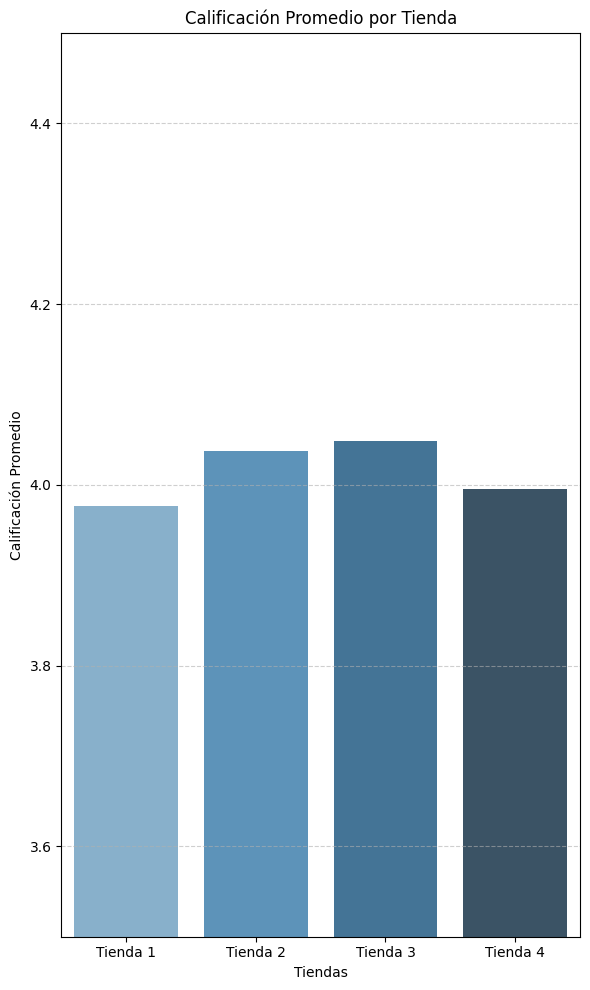

In [120]:
# Calificación promedio por tienda
calificaciones_promedio = [tienda['Calificación'].mean() for tienda in tiendas]

# Etiquetas
etiquetas = [f'Tienda {i+1}' for i in range(len(tiendas))]

# Gráfico
plt.figure(figsize=(6, 10))
sns.barplot(x=etiquetas, y=calificaciones_promedio, palette='Blues_d')

plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Calificación Promedio')
plt.ylim(3.5, 4.50)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 6.A Grafico


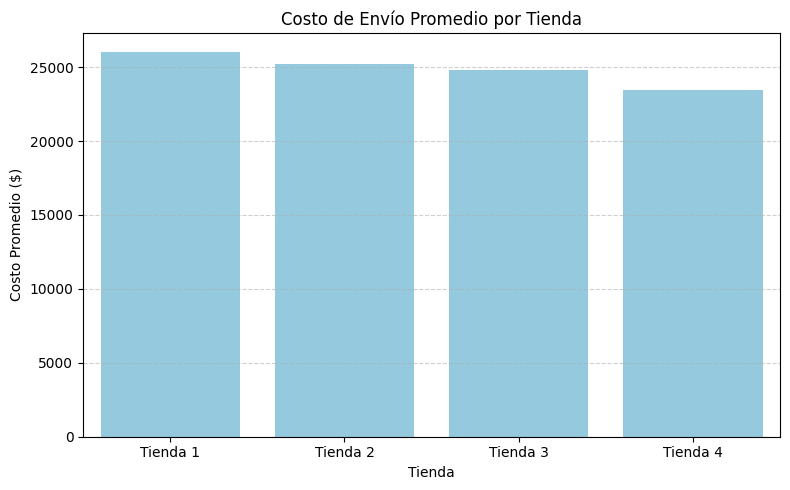

In [6]:
# Cálculo del costo promedio por tienda
costos_envio_promedio = [tienda['Costo'].mean() for tienda in tiendas]
etiquetas = [f'Tienda {i+1}' for i in range(len(tiendas))]

# Gráfico de barras
plt.figure(figsize=(8,5))
sns.barplot(x=etiquetas, y=costos_envio_promedio, color='skyblue')

plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo Promedio ($)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


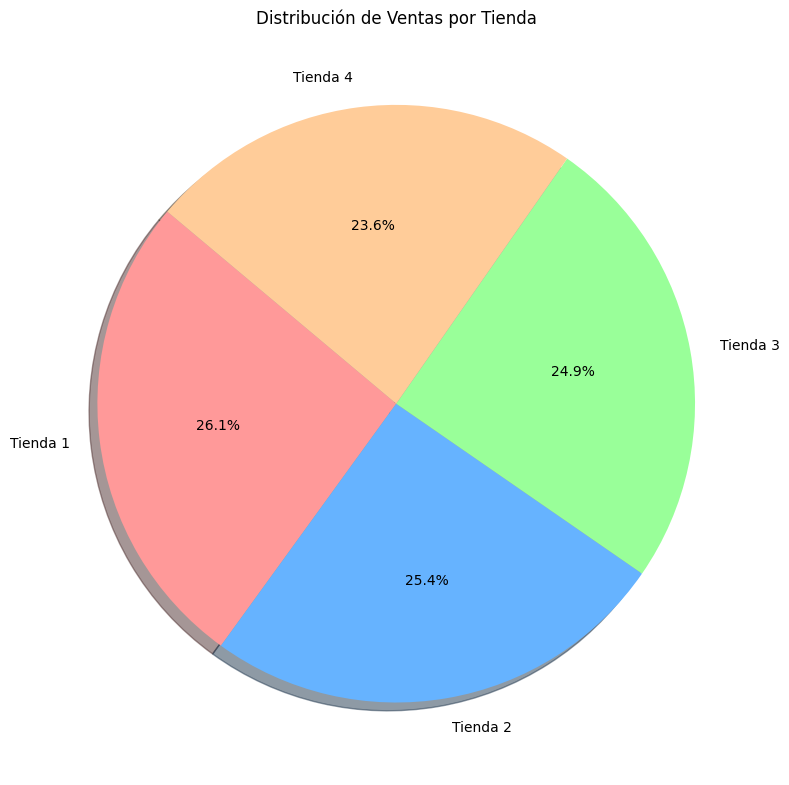

In [3]:
# Calcular facturación total por tienda
facturacion_total_por_tienda = [tienda['Precio'].sum() for tienda in tiendas]

# Etiquetas para cada tienda
etiquetas = [f'Tienda {i+1}' for i in range(len(tiendas))]

# Colores personalizados (opcional)
colores = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(facturacion_total_por_tienda, labels=etiquetas, autopct='%1.1f%%', startangle=140, colors=colores, shadow=True)
plt.title('Distribución de Ventas por Tienda')
plt.axis('equal')  # Para que sea un círculo perfecto
plt.tight_layout()
plt.show()
